In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
cd drive/MyDrive/NLP/ML4Finance

/content/drive/MyDrive/NLP/ML4Finance


In [5]:
import pandas as pd
import torch
from transformers import AutoTokenizer, AutoModelForSequenceClassification
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
import seaborn as sns
import numpy as np
import scipy
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from utils import *

## Create datasets

In [10]:
#Import the dataset
data_path = 'all-data.csv'
df = pd.read_csv(data_path,
                   encoding='unicode_escape',
                   names=['label', 'text'])

In [11]:
sentiments = {
    "negative": 0,
    "positive": 1,
    "neutral": 2
}

In [12]:
df['label'] = df['label'].map(sentiments)

In [13]:
df

,label,text
0,2,"According to Gran , the company has no plans t..."
1,2,Technopolis plans to develop in stages an area...
2,0,The international electronic industry company ...
3,1,With the new production plant the company woul...
4,1,According to the company 's updated strategy f...
...,...,...
4841,0,LONDON MarketWatch -- Share prices ended lower...
4842,2,Rinkuskiai 's beer sales fell by 6.5 per cent ...
4843,0,Operating profit fell to EUR 35.4 mn from EUR ...
4844,0,Net sales of the Paper segment decreased to EU...


## Date preprocessing and statistics

In [14]:
df["text"]=df["text"].str.lower() #We convert our texts to lowercase.
df["text"]=df["text"].str.replace("[^\w\s]","") #We remove punctuation marks from our texts.

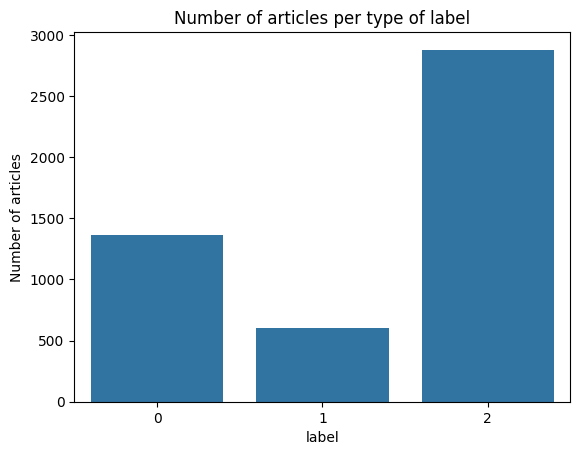

The proportion of each label in the dataset is 
 label
2    0.594098
1    0.281263
0    0.124639
Name: proportion, dtype: float64


In [15]:
ax = sns.barplot(x= df.label.unique(), y=df.label.value_counts())
ax.set(xlabel='label', ylabel='Number of articles' , title='Number of articles per type of label')
plt.show()

label_proportions = df['label'].value_counts(normalize=True)
print(f"The proportion of each label in the dataset is \n {label_proportions}")

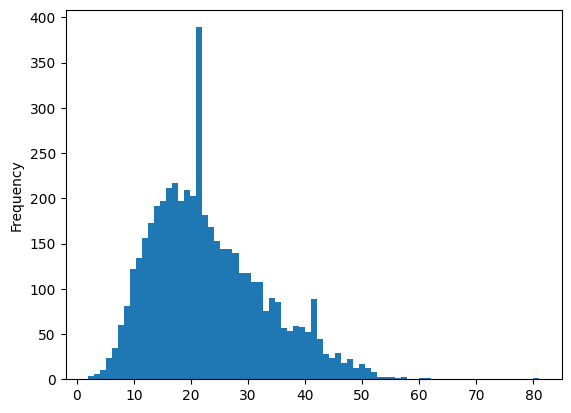

In [16]:
df['text'].apply(lambda x: len(x.split(" "))).mean()
df['text'].apply(lambda x: len(x.split(" "))).plot(kind='hist' , bins=  75)
plt.show()

# Bag Of Word

In [ ]:
# Splitting the data into training and testing sets
X_train_bow, X_test_bow, y_train_bow, y_test_bow = train_test_split(df['text'], df['label'], test_size=0.2, random_state=42)

# Convert text data into a bag-of-words model
vectorizer = CountVectorizer()
X_train_bow = vectorizer.fit_transform(X_train_bow)
X_test_bow = vectorizer.transform(X_test_bow)

In [ ]:
y_pred_svm_bow = svm_classifier(X_train_bow, y_train_bow, X_test_bow)
y_pred_xgb_bow  = gradient_boosting_classifier(X_train_bow, y_train_bow, X_test_bow)
y_pred_nb_bow  = naive_bayes_classifier(X_train_bow, y_train_bow, X_test_bow)
y_pred_mlp_bow  = mlp_classifier(X_train_bow, y_train_bow, X_test_bow)

Iteration 1, loss = 0.82506043
Iteration 2, loss = 0.31514884
Iteration 3, loss = 0.07069508
Iteration 4, loss = 0.02809856
Iteration 5, loss = 0.02302382
Iteration 6, loss = 0.01691585
Iteration 7, loss = 0.01139768
Iteration 8, loss = 0.00751211
Iteration 9, loss = 0.00594021
Iteration 10, loss = 0.00460293
Iteration 11, loss = 0.00457834
Iteration 12, loss = 0.00463560
Iteration 13, loss = 0.00367302
Iteration 14, loss = 0.00360287
Iteration 15, loss = 0.00284513
Iteration 16, loss = 0.00293479
Iteration 17, loss = 0.00217411
Iteration 18, loss = 0.00222006
Iteration 19, loss = 0.00325195
Iteration 20, loss = 0.00246923
Iteration 21, loss = 0.00485134
Iteration 22, loss = 0.00353520
Iteration 23, loss = 0.00201352
Iteration 24, loss = 0.00270433
Iteration 25, loss = 0.00158013
Iteration 26, loss = 0.00162147
Iteration 27, loss = 0.00166508
Iteration 28, loss = 0.00303012
Iteration 29, loss = 0.00158918
Iteration 30, loss = 0.00141530
Iteration 31, loss = 0.00155082
Iteration 32, los

/Users/tony/opt/anaconda3/envs/ml4finbite/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (35) reached and the optimization hasn't converged yet.
  warnings.warn(


In [ ]:
performance_df_bow = pd.DataFrame(columns=['Model', 'Precision', 'Recall', 'F1-Score'])

In [ ]:
from utils import *

In [ ]:
performance_df_bow = update_performance(performance_df_bow, 'BoW & SVM', y_test_bow, y_pred_svm_bow)
performance_df_bow = update_performance(performance_df_bow, 'BoW & XGBoost', y_test_bow, y_pred_xgb_bow)
performance_df_bow = update_performance(performance_df_bow, 'BoW & Naive Bayes', y_test_bow, y_pred_nb_bow)
performance_df_bow = update_performance(performance_df_bow, 'BoW & MLP', y_test_bow, y_pred_mlp_bow)

/Users/tony/Desktop/Antoine/Semestre/ML for finance/ML4Fin/notebooks/model_selection/utils.py:94: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = pd.concat([df, new_row_df], ignore_index=True)


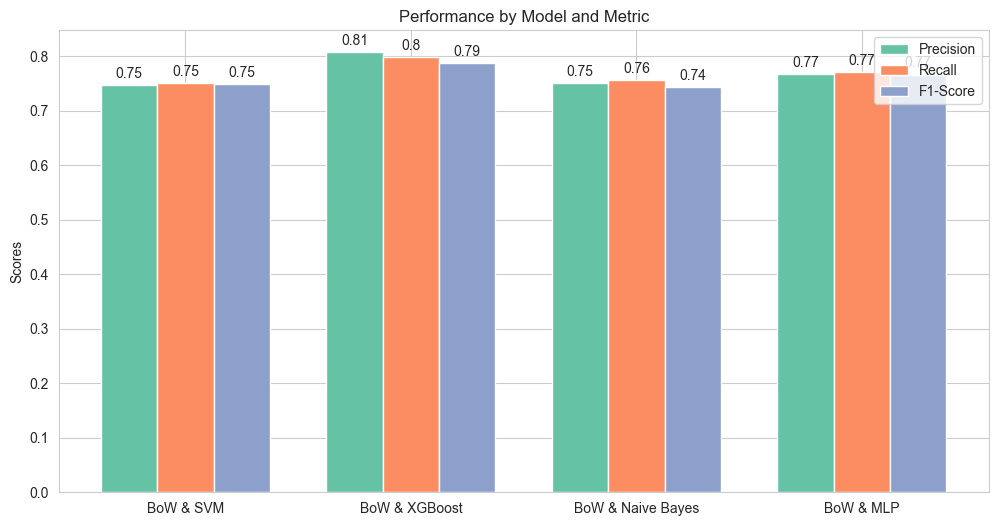

In [ ]:
plot_performance(performance_df_bow)

## TF-IDF

In [ ]:
X_train_tfidf, X_test_tfidf, y_train_tfidf, y_test_tfidf = train_test_split(df['text'], df['label'], test_size=0.2, random_state=42)

tfidf_vectorizer = TfidfVectorizer()

# Fit and transform the training data
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train_tfidf)

# Only transform the test data
X_test_tfidf = tfidf_vectorizer.transform(X_test_tfidf)

In [ ]:
#Classification using bag of words
y_pred_svm_tfidf = svm_classifier(X_train_tfidf, y_train_tfidf, X_test_tfidf)
y_pred_xgb_tfidf  = gradient_boosting_classifier(X_train_tfidf, y_train_tfidf, X_test_tfidf)
y_pred_nb_tfidf  = naive_bayes_classifier(X_train_tfidf, y_train_tfidf, X_test_tfidf)
y_pred_mlp_tfidf = mlp_classifier(X_train_tfidf, y_train_tfidf, X_test_tfidf)

Iteration 1, loss = 0.90531799
Iteration 2, loss = 0.54158466
Iteration 3, loss = 0.17668174
Iteration 4, loss = 0.04459689
Iteration 5, loss = 0.02189224
Iteration 6, loss = 0.01609810
Iteration 7, loss = 0.01274896
Iteration 8, loss = 0.00872698
Iteration 9, loss = 0.01086749
Iteration 10, loss = 0.00908581
Iteration 11, loss = 0.00807408
Iteration 12, loss = 0.00543398
Iteration 13, loss = 0.00480269
Iteration 14, loss = 0.00526475
Iteration 15, loss = 0.00547408
Iteration 16, loss = 0.00465891
Iteration 17, loss = 0.00457085
Iteration 18, loss = 0.00355964
Iteration 19, loss = 0.00400190
Iteration 20, loss = 0.00306042
Iteration 21, loss = 0.00395093
Iteration 22, loss = 0.00526149
Iteration 23, loss = 0.00200974
Iteration 24, loss = 0.00224355
Iteration 25, loss = 0.00257504
Iteration 26, loss = 0.00211432
Iteration 27, loss = 0.00245985
Iteration 28, loss = 0.00232592
Iteration 29, loss = 0.00270951
Iteration 30, loss = 0.00333793
Iteration 31, loss = 0.00190411
Iteration 32, los

/Users/tony/opt/anaconda3/envs/ml4finbite/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (35) reached and the optimization hasn't converged yet.
  warnings.warn(


/Users/tony/Desktop/Antoine/Semestre/ML for finance/ML4Fin/notebooks/model_selection/utils.py:94: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = pd.concat([df, new_row_df], ignore_index=True)


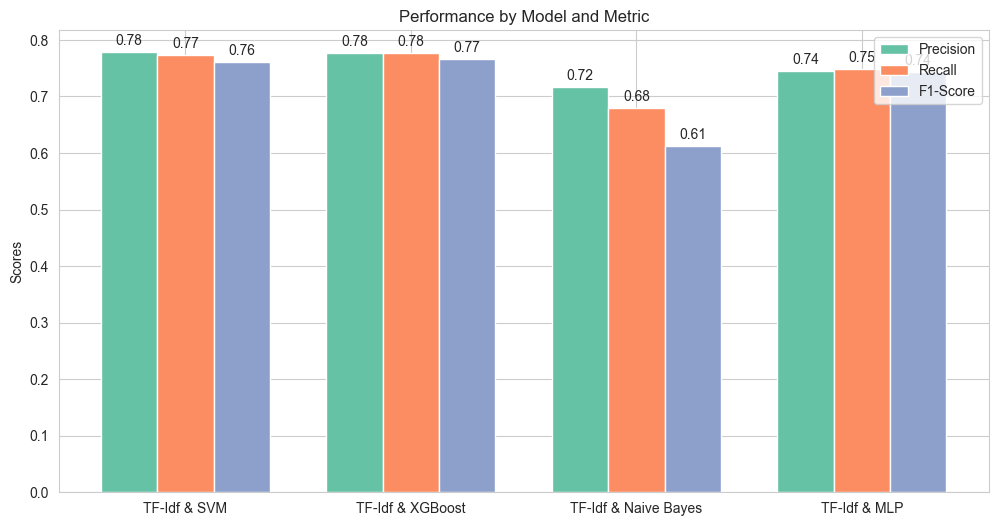

In [ ]:
performance_df_tfidf = pd.DataFrame(columns=['Model', 'Precision', 'Recall', 'F1-Score'])

performance_df_tfidf = update_performance(performance_df_tfidf, 'TF-Idf & SVM', y_test_tfidf, y_pred_svm_tfidf)
performance_df_tfidf = update_performance(performance_df_tfidf, 'TF-Idf & XGBoost', y_test_tfidf, y_pred_xgb_tfidf)
performance_df_tfidf = update_performance(performance_df_tfidf, 'TF-Idf & Naive Bayes', y_test_tfidf, y_pred_nb_tfidf)
performance_df_tfidf = update_performance(performance_df_tfidf, 'TF-Idf & MLP', y_test_tfidf, y_pred_mlp_tfidf)

plot_performance(performance_df_tfidf)

## Glove

In [ ]:
def load_glove_model(glove_file_path):
    print("Loading Glove Model")
    with open(glove_file_path, 'r', encoding='utf-8') as f:
        glove_model = {}
        for line in f:
            split_line = line.split()
            word = split_line[0]
            embedding = np.array([float(val) for val in split_line[1:]])
            glove_model[word] = embedding
        print(f"{len(glove_model)} words loaded!")
        return glove_model

#Download glove from https://www.kaggle.com/datasets/thanakomsn/glove6b300dtxt
glove_path = '../../data/model/glove.6B.300d.txt'
glove_model = load_glove_model(glove_path)

X_train_glove, X_test_glove, y_train_glove, y_test_glove = train_test_split(df['text'], df['label'], test_size=0.2, random_state=42)

Loading Glove Model
400000 words loaded!


In [ ]:
def document_vector(glove_model, doc):
    words = doc.split()
    word_vectors = [glove_model[word] for word in words if word in glove_model]
    return np.mean(word_vectors, axis=0) if word_vectors else np.zeros(300)  # 300 is the GloVe vector size

X_train_vectors_glove = np.array([document_vector(glove_model, text) for text in X_train_glove])
X_test_vectors_glove = np.array([document_vector(glove_model, text) for text in X_test_glove])

In [ ]:
#Classification using bag of words
y_pred_svm_Glove = svm_classifier(X_train_vectors_glove, y_train_glove, X_test_vectors_glove)
y_pred_xgb_Glove  = gradient_boosting_classifier(X_train_vectors_glove, y_train_glove, X_test_vectors_glove)
y_pred_mlp_Glove = mlp_classifier(X_train_vectors_glove, y_train_glove, X_test_vectors_glove)

#Add a logistic regression classifier
y_pred_lr_Glove = logistic_regression_classifier(X_train_vectors_glove, y_train_glove, X_test_vectors_glove)

Iteration 1, loss = 0.82928005
Iteration 2, loss = 0.67988418
Iteration 3, loss = 0.62872236
Iteration 4, loss = 0.56612287
Iteration 5, loss = 0.51767982
Iteration 6, loss = 0.47785449
Iteration 7, loss = 0.43071665
Iteration 8, loss = 0.41225248
Iteration 9, loss = 0.36356988
Iteration 10, loss = 0.33934493
Iteration 11, loss = 0.30308080
Iteration 12, loss = 0.27953763
Iteration 13, loss = 0.21808637
Iteration 14, loss = 0.19809016
Iteration 15, loss = 0.16528121
Iteration 16, loss = 0.13213783
Iteration 17, loss = 0.11911117
Iteration 18, loss = 0.11130442
Iteration 19, loss = 0.08769947
Iteration 20, loss = 0.07271374
Iteration 21, loss = 0.07507511
Iteration 22, loss = 0.05820952
Iteration 23, loss = 0.04312056
Iteration 24, loss = 0.03780935
Iteration 25, loss = 0.03680952
Iteration 26, loss = 0.02874920
Iteration 27, loss = 0.04718896
Iteration 28, loss = 0.03184374
Iteration 29, loss = 0.02616765
Iteration 30, loss = 0.02224761
Iteration 31, loss = 0.01702620
Iteration 32, los

/Users/tony/opt/anaconda3/envs/ml4finbite/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (35) reached and the optimization hasn't converged yet.
  warnings.warn(


/Users/tony/Desktop/Antoine/Semestre/ML for finance/ML4Fin/notebooks/model_selection/utils.py:94: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = pd.concat([df, new_row_df], ignore_index=True)


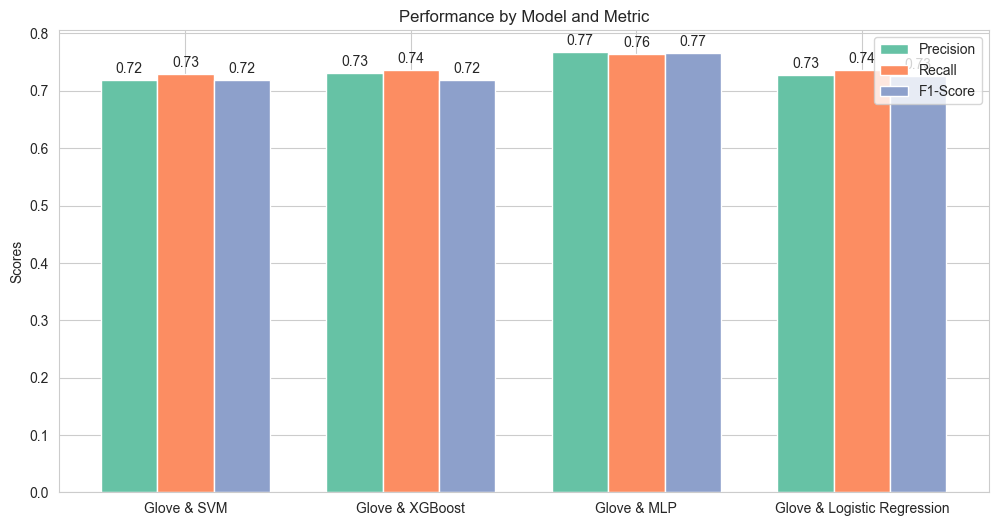

In [ ]:
performance_df_glove = pd.DataFrame(columns=['Model', 'Precision', 'Recall', 'F1-Score'])

performance_df_glove = update_performance(performance_df_glove, 'Glove & SVM', y_test_glove, y_pred_svm_Glove)
performance_df_glove = update_performance(performance_df_glove, 'Glove & XGBoost', y_test_glove, y_pred_xgb_Glove)
performance_df_glove = update_performance(performance_df_glove, 'Glove & MLP', y_test_glove, y_pred_mlp_Glove)
performance_df_glove = update_performance(performance_df_glove, 'Glove & Logistic Regression', y_test_glove, y_pred_lr_Glove)


plot_performance(performance_df_glove)

## FinBert

In [17]:
tokenizer_finbert = AutoTokenizer.from_pretrained("ProsusAI/finbert")
model_finbert = AutoModelForSequenceClassification.from_pretrained("ProsusAI/finbert")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


In [18]:
X_test_finbert = df['text'].to_list()
y_test_finbert = df['label'].to_list()

In [19]:
#Map the predictions to numerical values
y_pred_finbert, y_pred_proba_finbert = classify_model(X_test_finbert, tokenizer_finbert, model_finbert)

In [21]:
y_pred_finbert = [sentiments[item] for item in y_pred_finbert]

In [22]:
#Asses the performance of the model
finbert_performance = pd.DataFrame(classification_report(y_pred_finbert, y_test_finbert, output_dict=True))
finbert_performance

,0,1,2,accuracy,macro avg,weighted avg
precision,0.970199,0.920763,0.857589,0.889393,0.916184,0.894769
recall,0.801642,0.810200,0.962198,0.889393,0.858013,0.889393
f1-score,0.877903,0.861951,0.906887,0.889393,0.882247,0.888151
support,731.000000,1549.000000,2566.000000,0.889393,4846.000000,4846.000000


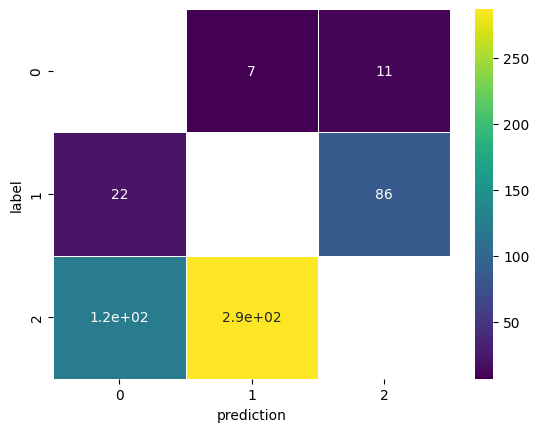

In [23]:
#FinBert is the most accurate model, we will look at the predictions it made and the probability it assigned to each prediction
finbert_df = pd.DataFrame({'text': X_test_finbert, 'label': y_test_finbert, 'prediction': y_pred_finbert, 'probability': y_pred_proba_finbert})

#We look at the articles that were misclassified
missclassified = finbert_df[finbert_df['label'] != finbert_df['prediction']]

#Count the number of pairs of label and prediction
missclassified = missclassified.groupby(['label', 'prediction']).count().reset_index().drop(columns=['probability'])

#plot a heat map of the number of misclassified articles
missclassified = missclassified.pivot(index='label', columns='prediction', values='text')
sns.heatmap(missclassified, annot=True, cmap="viridis", linewidths=.5)
plt.show()

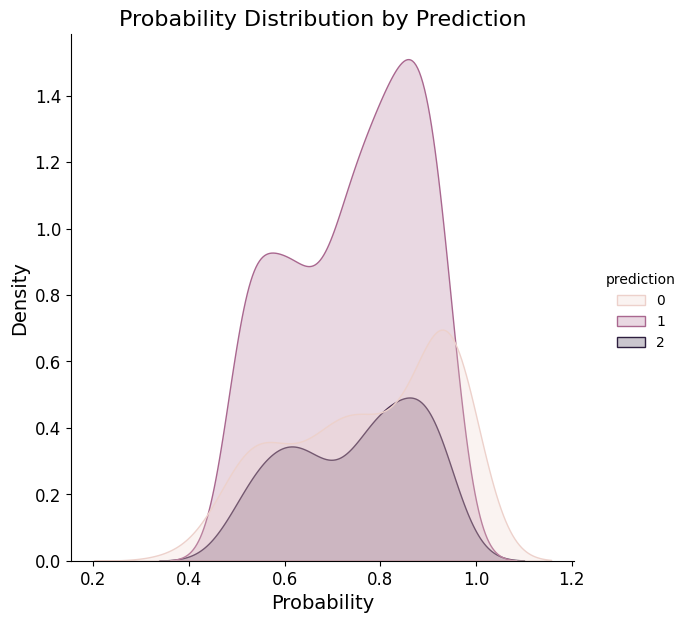

In [24]:
#Plot the distribution of the probability of the prediction
missclassified = finbert_df[finbert_df['label'] != finbert_df['prediction']]

# Improved version
sns.displot(missclassified, x="probability", hue="prediction", kind="kde", fill=True, height=6)
plt.title("Probability Distribution by Prediction", fontsize=16)
plt.xlabel("Probability", fontsize=14)
plt.ylabel("Density", fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

## Distill-Roberta

In [28]:
tokenizer_roberta = AutoTokenizer.from_pretrained("mrm8488/distilroberta-finetuned-financial-news-sentiment-analysis")
model_roberta = AutoModelForSequenceClassification.from_pretrained("mrm8488/distilroberta-finetuned-financial-news-sentiment-analysis")

tokenizer_config.json:   0%|          | 0.00/333 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/798k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/933 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/328M [00:00<?, ?B/s]

In [29]:
X_test_roberta = df['text'].to_list()
y_test_roberta = df['label'].to_list()

In [30]:
#Map the predictions to numerical values
y_pred_roberta, y_pred_proba_roberta = classify_model(X_test_roberta , tokenizer_roberta , model_roberta)

In [31]:
y_pred_roberta = [sentiments[item] for item in y_pred_roberta]

In [32]:
#Asses the performance of the model
roberta_performance = pd.DataFrame(classification_report(y_pred_roberta, y_test_roberta, output_dict=True))
roberta_performance

,0,1,2,accuracy,macro avg,weighted avg
precision,0.773179,0.809978,0.894755,0.855757,0.825971,0.857253
recall,0.871269,0.802909,0.877683,0.855757,0.850620,0.855757
f1-score,0.819298,0.806428,0.886137,0.855757,0.837288,0.856128
support,536.000000,1375.000000,2935.000000,0.855757,4846.000000,4846.000000
